# Time Series Analysis

## 1. Import time series
Conjunto de valores ordenados en el tiempo

In [1]:
# =============================================================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS PARA EL ANÁLISIS DE SERIES TEMPORALES
# =============================================================================

# Librería para parsear (analizar) fechas en diferentes formatos
from dateutil.parser import parse 

# Matplotlib: librería principal para crear gráficos en Python
import matplotlib as mpl
import matplotlib.pyplot as plt

# Seaborn: librería de visualización basada en matplotlib, con estilos más elegantes
import seaborn as sns

# NumPy: librería fundamental para cálculos numéricos y trabajo con arrays
import numpy as np

# Pandas: librería esencial para manipulación y análisis de datos
import pandas as pd

# Configuración global de los gráficos:
# - figure.figsize: tamaño de las figuras en pulgadas (ancho, alto)
# - figure.dpi: resolución de las figuras (dots per inch - puntos por pulgada)
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
# =============================================================================
# IMPORTACIÓN DE DATOS DE SERIE TEMPORAL - PRIMER INTENTO
# =============================================================================

# Leemos el archivo CSV con datos de consumo de fármacos antidiabéticos
# Parámetros:
#   - 'data/a10.csv': ruta del archivo
#   - parse_dates=['date']: convierte la columna 'date' a formato fecha automáticamente
df = pd.read_csv('data/a10.csv', parse_dates=['date'])

# Mostramos las primeras 5 filas para verificar que se cargó correctamente
# Nota: La columna 'date' NO es el índice aún, es solo una columna más
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
# =============================================================================
# IMPORTACIÓN DE DATOS - VERSIÓN MEJORADA CON ÍNDICE DE FECHA
# =============================================================================

# Volvemos a leer el archivo, pero ahora configuramos 'date' como ÍNDICE del DataFrame
# Esto es MUY IMPORTANTE en series temporales porque:
#   1. Facilita el filtrado por rangos de fechas
#   2. Permite usar funciones específicas de series temporales
#   3. Mejora la visualización automática en gráficos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Ahora vemos que 'date' aparece como índice (no como columna normal)
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [4]:
# =============================================================================
# MANIPULACIÓN DE FECHAS: EXTRACCIÓN DE COMPONENTES TEMPORALES
# =============================================================================

# Convertimos el índice (que son fechas) a formato string (texto)
df['fecha_str'] = df.index.astype(str)

# Separamos la fecha en sus componentes: año, mes y día
# str.split('-', expand=True) divide el texto por el guion y crea columnas separadas
# Ejemplo: '1991-07-01' se convierte en ['1991', '07', '01']
df[['year', 'month', 'day']] = df['fecha_str'].str.split('-', expand=True)

# Convertimos las columnas de texto a números enteros
# Por defecto str.split devuelve texto, pero necesitamos números para hacer cálculos
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

# Reconstruimos la fecha a partir de los componentes separados
# Esto es útil cuando quieres manipular fechas manualmente
df['new_date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Mostramos el resultado: ahora tenemos la fecha original Y sus componentes separados
df.head()

,value,fecha_str,year,month,day,new_date
date,,,,,,
1991-07-01,3.526591,1991-07-01,1991,7,1,1991-07-01
1991-08-01,3.180891,1991-08-01,1991,8,1,1991-08-01
1991-09-01,3.252221,1991-09-01,1991,9,1,1991-09-01
1991-10-01,3.611003,1991-10-01,1991,10,1,1991-10-01
1991-11-01,3.565869,1991-11-01,1991,11,1,1991-11-01


## 2. Panel data
Contiene una o más variables relacionadas, en el mismo periodo de tiempo.

In [5]:
# =============================================================================
# EJEMPLO DE PANEL DATA - DATOS DE MÚLTIPLES VARIABLES
# =============================================================================

# Cargamos datos de llegadas al mercado (Market Arrivals)
# Panel data = datos que contienen múltiples variables a lo largo del tiempo
df = pd.read_csv('data/MarketArrivals.csv')

# Filtramos solo los datos del mercado de MUMBAI
# df.loc[condición, :] selecciona todas las columnas (:) donde la condición es True
df = df.loc[df.market=='MUMBAI', :]

# Visualizamos las primeras filas
# Podemos ver: market, month, year, quantity, precios (min, max, mod), estado, ciudad, fecha
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 3. Plot time series
Teniendo los datos en formato fecha y ordenados, es sencilla la representación. Un `plot` de matplotlib.pyplot sería suficiente.

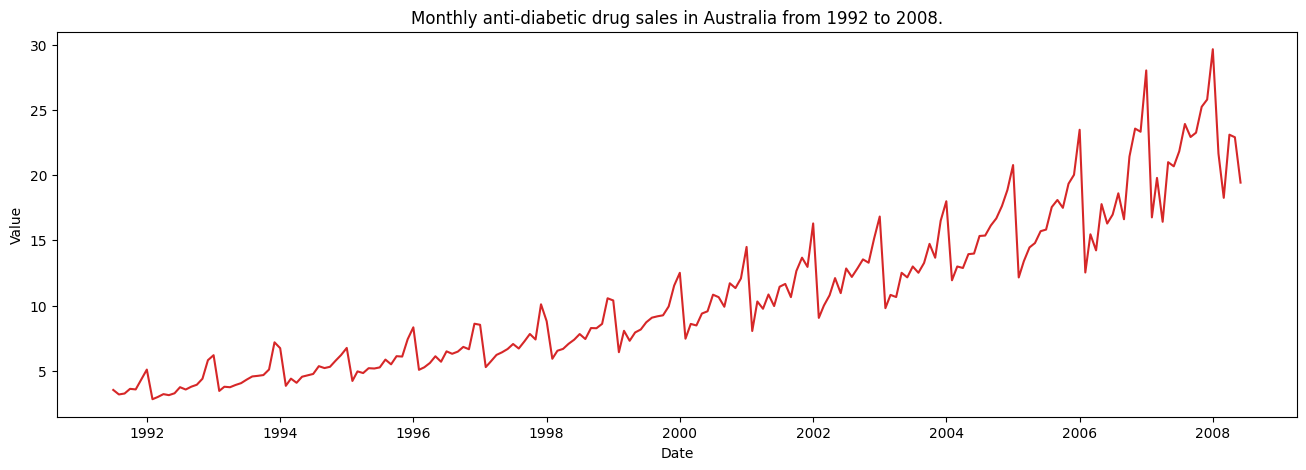

In [6]:
# =============================================================================
# CREACIÓN DE FUNCIÓN PARA GRAFICAR SERIES TEMPORALES
# =============================================================================

# Volvemos a cargar los datos de fármacos antidiabéticos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Definimos una función reutilizable para hacer gráficos de series temporales
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    """
    Función para graficar series temporales de forma consistente
    
    Parámetros:
        df: DataFrame con los datos
        x: valores del eje X (generalmente fechas)
        y: valores del eje Y (la variable a graficar)
        title: título del gráfico
        xlabel: etiqueta del eje X
        ylabel: etiqueta del eje Y
        dpi: resolución del gráfico
    """
    # Creamos una nueva figura con tamaño específico
    plt.figure(figsize=(16,5), dpi=dpi)
    
    # Dibujamos la línea con color rojo
    plt.plot(x, y, color='tab:red')
    
    # plt.gca() = "get current axes" (obtener los ejes actuales)
    # Configuramos título y etiquetas de los ejes
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    
    # Mostramos el gráfico
    plt.show()

# Llamamos a la función para graficar nuestros datos
# df.index contiene las fechas, df.value contiene las ventas de fármacos
plot_df(df, x=df.index, y=df.value, 
        title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

Podemos enfatizar el crecimiento de los datos creando una gráfica simétrica

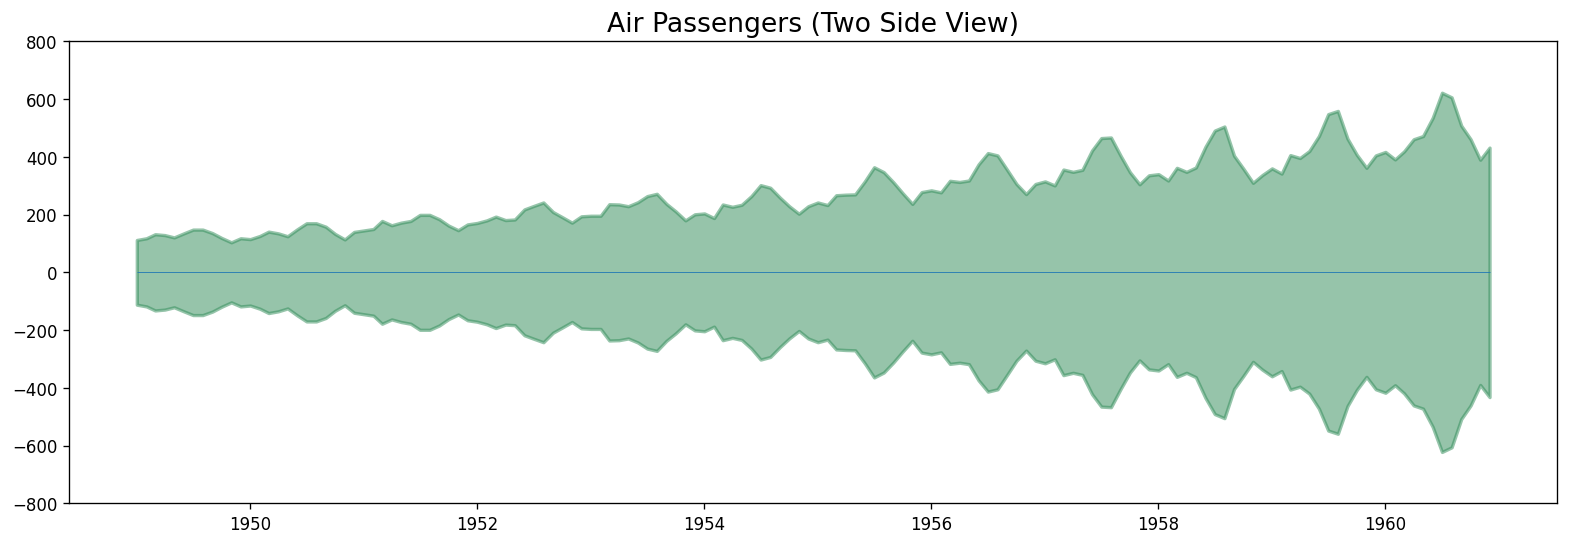

In [7]:
# =============================================================================
# GRÁFICO SIMÉTRICO PARA ENFATIZAR EL CRECIMIENTO
# =============================================================================

# Importamos datos de pasajeros de aerolíneas
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['date'])

# Extraemos los valores como arrays de NumPy para facilitar la manipulación
x = df['date'].values  # Fechas en el eje X
y1 = df['value'].values  # Número de pasajeros en el eje Y

# Creamos la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi=120)

# fill_between crea un área rellena entre dos curvas
# Aquí creamos un efecto espejo: valores positivos arriba, negativos (espejo) abajo
# Esto ayuda a visualizar mejor el crecimiento y la simetría de los datos
plt.fill_between(x, 
                 y1=y1,        # Límite superior (valores originales)
                 y2=-y1,       # Límite inferior (valores negativos, espejo)
                 alpha=0.5,    # Transparencia (0=transparente, 1=opaco)
                 linewidth=2,  # Grosor de la línea del borde
                 color='seagreen')  # Color verde marino

# Limitamos el eje Y para que se vea bien el efecto simétrico
plt.ylim(-800, 800)

# Agregamos un título
plt.title('Air Passengers (Two Side View)', fontsize=16)

# Dibujamos una línea horizontal en y=0 para marcar el centro
# xmin y xmax definen dónde comienza y termina la línea
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)

# Mostramos el gráfico
plt.show()

Puesto que tenemos datos mensuales, con cierto patrón repetitivo, podremos visualizar una comparativa año a año.

Es posible observar que hay un gran consumo de fármacos en enero, y gran caida en febrero.

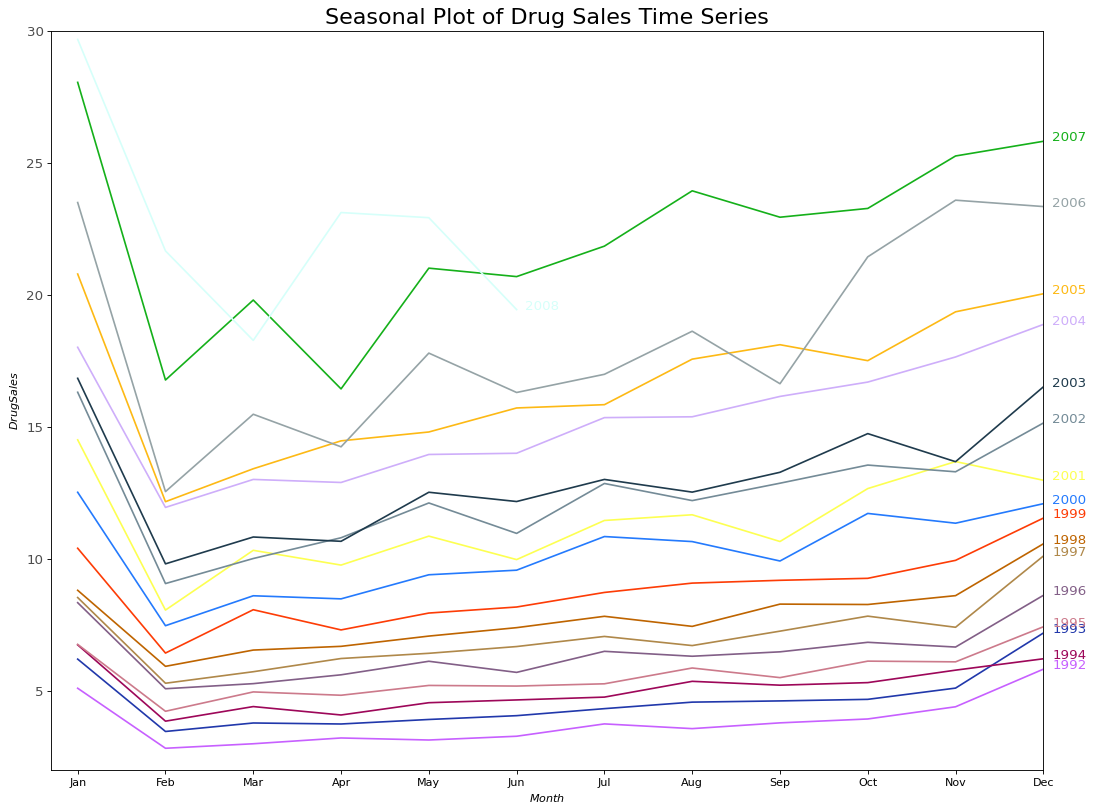

In [8]:
# =============================================================================
# GRÁFICO ESTACIONAL (SEASONAL PLOT) - COMPARACIÓN AÑO A AÑO
# =============================================================================

# Importamos datos de ventas de fármacos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# reset_index() convierte el índice (fechas) en una columna normal llamada 'date'
# Esto facilita extraer componentes de la fecha
df.reset_index(inplace=True)  # inplace=True modifica el DataFrame original

# Extraemos el año de cada fecha
df['year'] = [d.year for d in df.date]

# Extraemos el mes como abreviatura de 3 letras (Jan, Feb, Mar, etc.)
# strftime('%b') formatea la fecha para mostrar solo el mes abreviado
df['month'] = [d.strftime('%b') for d in df.date]

# Obtenemos todos los años únicos en el dataset
years = df['year'].unique()

# Preparamos colores aleatorios para cada año
np.random.seed(100)  # Fijamos la semilla para que los colores sean reproducibles
# Seleccionamos colores aleatorios de la paleta XKCD (854 colores con nombres)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Creamos el gráfico
plt.figure(figsize=(16,12), dpi=80)

# Iteramos sobre cada año para dibujar una línea
for i, y in enumerate(years):
    # i = índice (0, 1, 2, ...), y = año (1991, 1992, ...)
    
    if i > 0:  # Saltamos el primer año para evitar datos incompletos
        # Graficamos 'month' en eje X y 'value' en eje Y, filtrando solo el año actual
        plt.plot('month', 'value', 
                data=df.loc[df.year==y, :],  # Filtramos solo las filas del año 'y'
                color=mycolors[i],  # Color único para este año
                label=y)  # Etiqueta para la leyenda
        
        # Agregamos una etiqueta de texto al final de cada línea con el año
        # df.shape[0] = número de meses, -0.9 ajusta la posición horizontal
        # [-1:].values[0] obtiene el último valor de ventas del año
        plt.text(df.loc[df.year==y, :].shape[0]-.9,  # Posición X (casi al final)
                df.loc[df.year==y, 'value'][-1:].values[0],  # Posición Y (último valor)
                y,  # Texto a mostrar (el año)
                fontsize=12, 
                color=mycolors[i])  # Mismo color que la línea

# Configuración de los ejes y decoración
plt.gca().set(xlim=(-0.3, 11),  # Límites del eje X (12 meses: 0-11)
             ylim=(2, 30),       # Límites del eje Y
             ylabel='$Drug Sales$',  # Etiqueta eje Y ($ $ activa formato matemático)
             xlabel='$Month$')        # Etiqueta eje X

# Configuramos el tamaño y transparencia de los números del eje Y
plt.yticks(fontsize=12, alpha=.7)

# Título del gráfico
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)

# Mostramos el gráfico
plt.show()

Vemos que cada año van incrementando las ventas, pero no se aprecia bien en la anterior gráfica. Podemos ver en un diagrama de caja cómo evolucionan las ventas anuales para destacar mejor ese progreso, y cómo varía cada año.

In [9]:
# =============================================================================
# INSPECCIÓN RÁPIDA DEL DATAFRAME COMPLETO
# =============================================================================

# Mostramos todo el DataFrame (se truncará automáticamente si es muy grande)
# Esto nos permite ver:
#   - Las primeras filas
#   - Las últimas filas  
#   - El número total de filas y columnas [204 rows x 4 columns]
#   - Los tipos de datos de cada columna
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


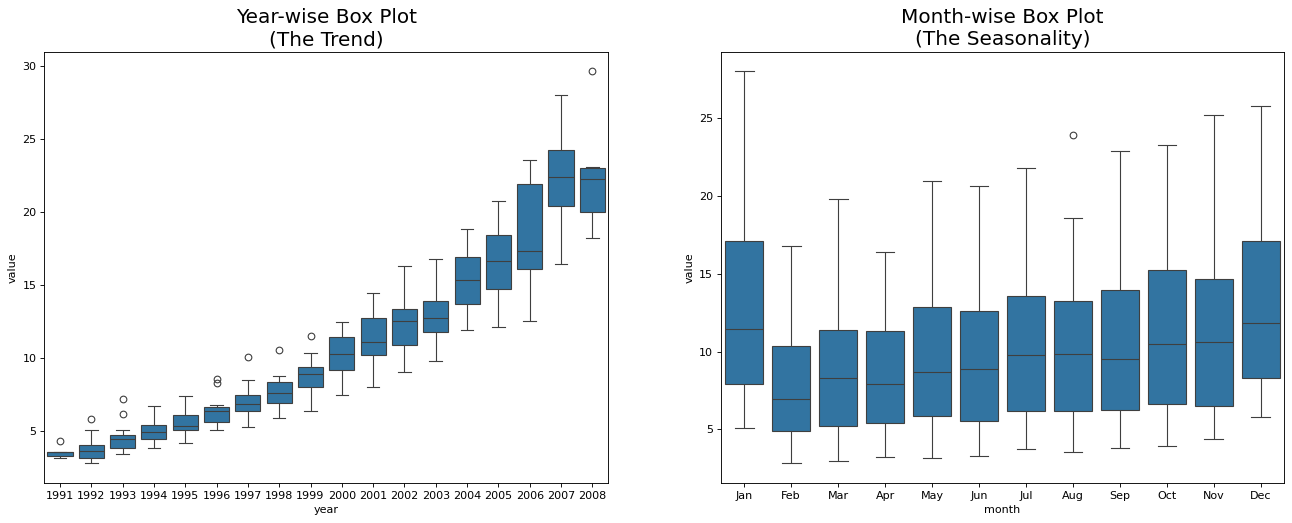

In [10]:
# =============================================================================
# BOX PLOTS (DIAGRAMAS DE CAJA) - ANÁLISIS DE TENDENCIA Y ESTACIONALIDAD
# =============================================================================

# Importamos los datos nuevamente
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Preparamos las columnas de año y mes
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Creamos una figura con 2 subgráficos lado a lado
# 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=80)

# GRÁFICO 1 (izquierda): Box plot por AÑO
# Muestra cómo las ventas aumentan año tras año (TENDENCIA)
# Cada caja representa la distribución de ventas mensuales de un año
sns.boxplot(x='year',   # Eje X: años
           y='value',  # Eje Y: ventas
           data=df,    # Datos
           ax=axes[0]) # Dibujar en el primer subplot

# GRÁFICO 2 (derecha): Box plot por MES
# Muestra el patrón repetitivo mensual (ESTACIONALIDAD)
# Excluimos 1991 y 2008 porque son años incompletos
# Cada caja representa cómo se comportan las ventas en ese mes a lo largo de los años
sns.boxplot(x='month',  # Eje X: meses
           y='value',  # Eje Y: ventas
           data=df.loc[~df.year.isin([1991, 2008]), :],  # Filtramos años completos
           ax=axes[1])  # Dibujar en el segundo subplot

# Configuramos los títulos de cada subplot
# Tendencia = cambio a largo plazo
# Estacionalidad = patrones que se repiten cada año
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

# Mostramos los gráficos
plt.show()

## 4. Decompose Time Series
Las series temporales se pueden descomponer en:

**Modelo aditivo**: Y(t) = T(t) + S(t) + c(t) + e(t)

**Modelo multiplicativo**: Y(t) = T(t) * S(t) * c(t) * e(t)

In [11]:
# =============================================================================
# DESCOMPOSICIÓN DE SERIES TEMPORALES
# =============================================================================

# Importamos la función de descomposición estacional de statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Cargamos los datos
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# DESCOMPOSICIÓN MULTIPLICATIVA
# Modelo: Y(t) = Tendencia(t) × Estacionalidad(t) × Ciclo(t) × Error(t)
# Se usa cuando la variación estacional CRECE con la tendencia
result_mul = seasonal_decompose(df['value'], 
                                model='multiplicative',  # Modelo multiplicativo
                                extrapolate_trend='freq')  # Extrapola tendencia en extremos

# DESCOMPOSICIÓN ADITIVA  
# Modelo: Y(t) = Tendencia(t) + Estacionalidad(t) + Ciclo(t) + Error(t)
# Se usa cuando la variación estacional es CONSTANTE
result_add = seasonal_decompose(df['value'], 
                                model='additive',  # Modelo aditivo
                                extrapolate_trend='freq')

# Componentes de la descomposición:
# - observed: serie original
# - trend: tendencia a largo plazo
# - seasonal: patrón estacional que se repite
# - resid: residuos (lo que no explican tendencia ni estacionalidad)

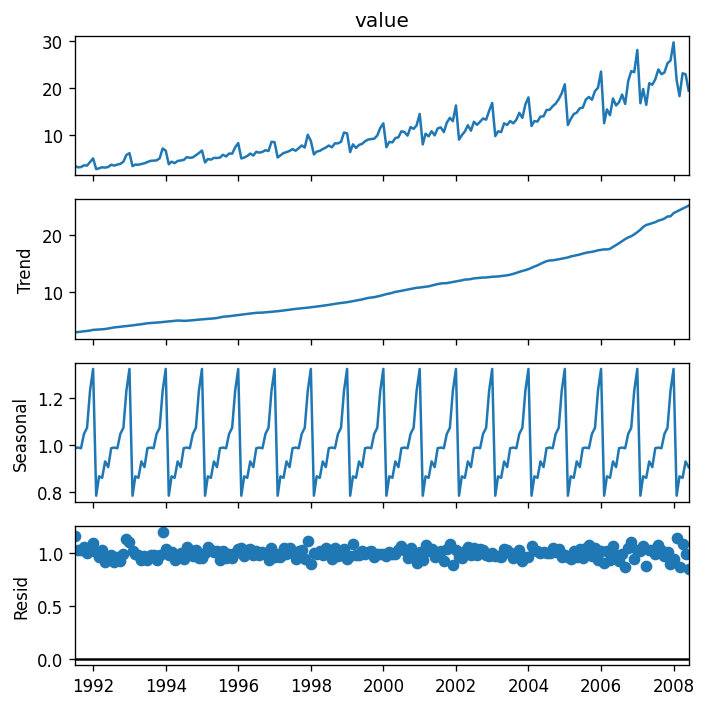

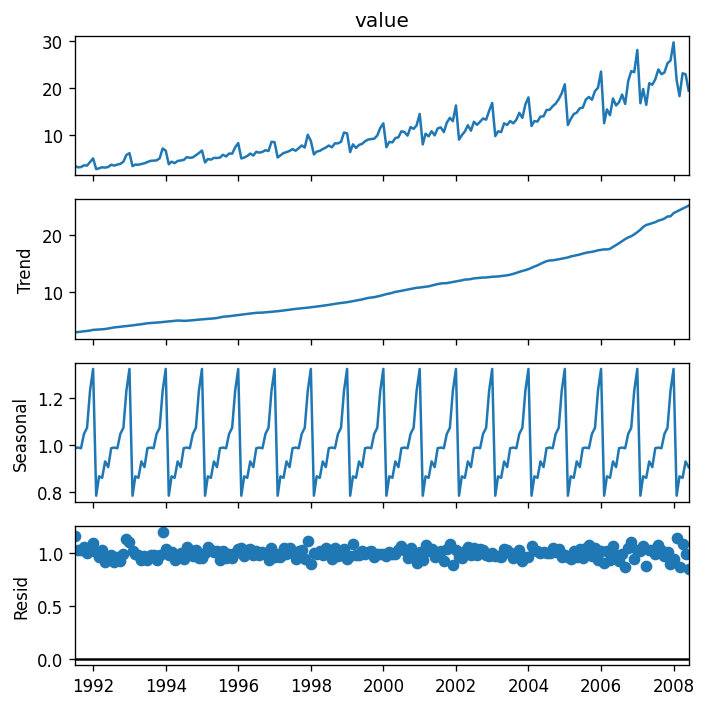

In [12]:
# =============================================================================
# VISUALIZACIÓN DE LA DESCOMPOSICIÓN MULTIPLICATIVA
# =============================================================================

# Actualizamos el tamaño por defecto de las figuras
plt.rcParams.update({'figure.figsize': (6,6)})

# El método .plot() de la descomposición crea automáticamente 4 subgráficos:
# 1. Observed (serie original)
# 2. Trend (tendencia)
# 3. Seasonal (estacionalidad)
# 4. Residual (residuos/errores)
result_mul.plot()  # El ; al final suprime la salida de texto innecesaria

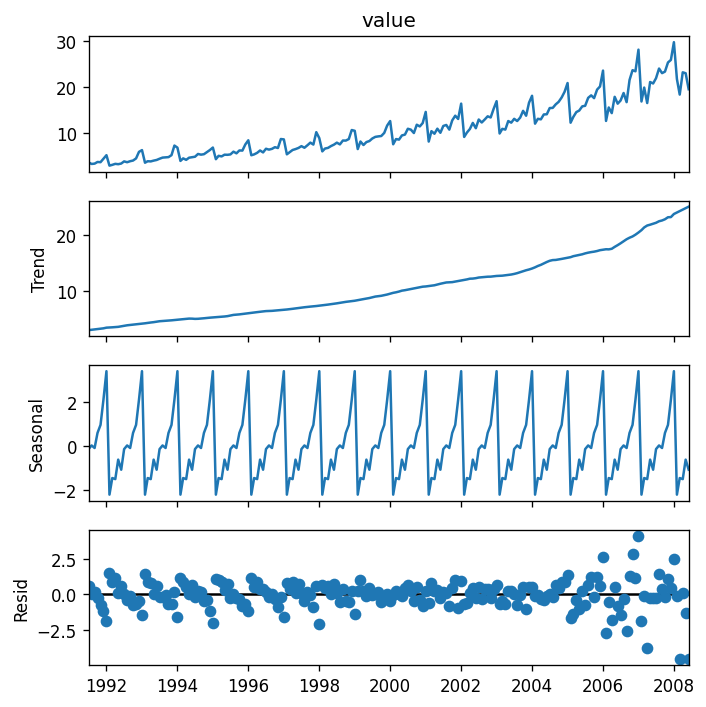

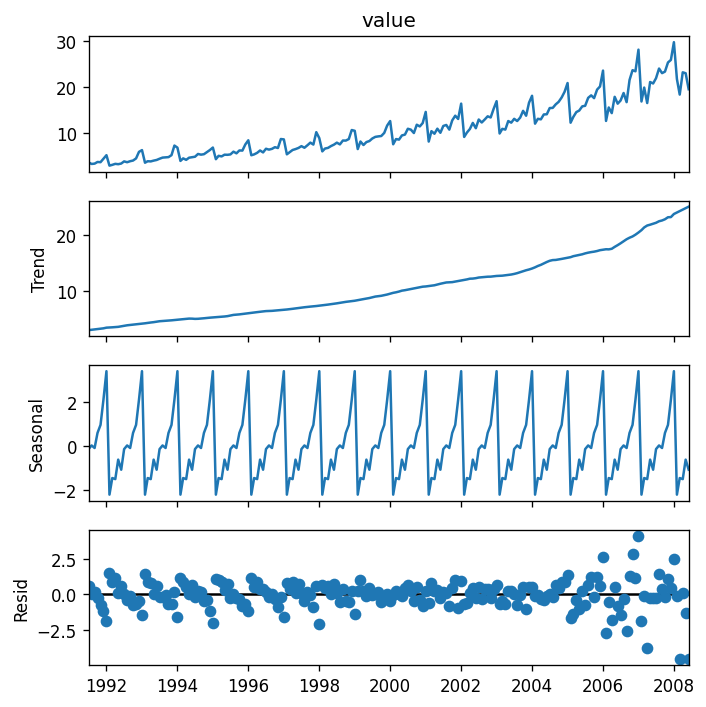

In [13]:
# =============================================================================
# VISUALIZACIÓN DE LA DESCOMPOSICIÓN ADITIVA
# =============================================================================

# Graficamos la descomposición aditiva con los mismos 4 componentes
# Comparar con la multiplicativa ayuda a decidir qué modelo se ajusta mejor
result_add.plot()

In [14]:
# =============================================================================
# RECONSTRUCCIÓN DEL DATAFRAME CON COMPONENTES MULTIPLICATIVOS
# =============================================================================

# Combinamos todos los componentes de la descomposición en un solo DataFrame
# pd.concat une DataFrames/Series horizontalmente (axis=1 = columnas)
df_reconstructed = pd.concat([result_mul.seasonal,  # Componente estacional
                             result_mul.trend,      # Componente de tendencia
                             result_mul.resid,      # Residuos
                             result_mul.observed],  # Serie original
                             axis=1)  # axis=1 = concatenar como columnas

# Mostramos las primeras filas
# Verificamos que: observed = seasonal × trend × resid (modelo multiplicativo)
df_reconstructed.head()

,seasonal,trend,resid,value
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


## 5. Root Test Stationary
Utilizamos los root test para comprobar si la serie es stationary. La hipótesis nula de los test supone que la serie NO es estacionaria. Si el resultado del test queda por debajo del nivel de significación (0.05), rechazaremos la hipótesis nula en favor de la alternativa. La serie será estacionaria. En caso contrario la serie NO es estacionaria y por tanto habrá que aplicar técnicas de diferenciación.

In [15]:
# =============================================================================
# TEST DE DICKEY-FULLER AUMENTADO (ADF) - PRUEBA DE ESTACIONARIEDAD
# =============================================================================

# Importamos el test de Augmented Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

# Ejecutamos el test sobre nuestra serie temporal
# El test evalúa si la serie es estacionaria o no
result = adfuller(df['value'])

# El resultado es una tupla con:
# [0] Estadístico del test (ADF statistic)
# [1] p-value (valor p)
# [2] Número de lags utilizados
# [3] Número de observaciones
# [4] Valores críticos para diferentes niveles de confianza (1%, 5%, 10%)
# [5] Criterio de información (AIC/BIC)

# INTERPRETACIÓN:
# - Si p-value > 0.05: NO rechazamos H0 → Serie NO es estacionaria
# - Si p-value <= 0.05: Rechazamos H0 → Serie ES estacionaria
# 
# En este caso: p-value = 1.0 → La serie NO es estacionaria
# Necesitamos aplicar diferenciación o eliminar tendencia
result

(np.float64(3.14518568930675),
 1.0,
 15,
 188,
 {'1%': np.float64(-3.465620397124192),
  '5%': np.float64(-2.8770397560752436),
  '10%': np.float64(-2.5750324547306476)},
 np.float64(549.6705685364172))

<Axes: xlabel='date'>

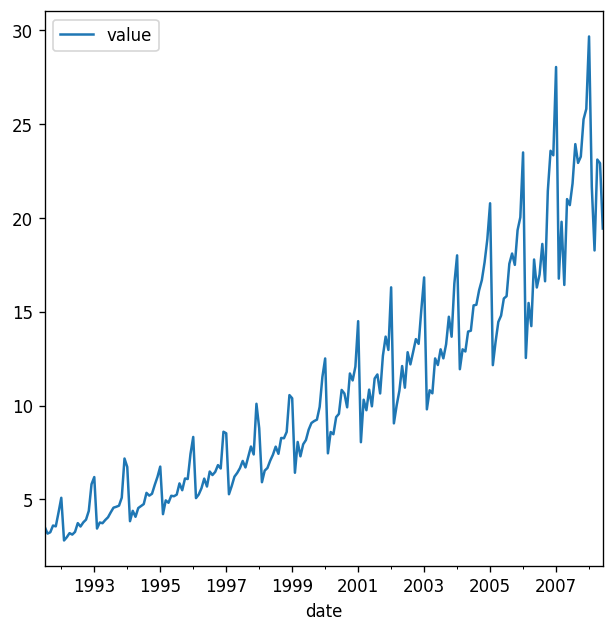

In [16]:
# =============================================================================
# GRÁFICO RÁPIDO DE LA SERIE ORIGINAL
# =============================================================================

# Cargamos y graficamos los datos para visualizar por qué NO es estacionaria
df = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

# Se observa claramente:
# - Tendencia creciente (no estacionaria en media)
# - Varianza que aumenta con el tiempo (no estacionaria en varianza)
# - Estacionalidad (patrones repetitivos)
df.plot()  # El ; suprime salida innecesaria

## 6. Detrend a time series

In [17]:
# =============================================================================
# RECONSTRUCCIÓN DEL DATAFRAME CON COMPONENTES ADITIVOS
# =============================================================================

# Ahora creamos el DataFrame con los componentes del modelo ADITIVO
# (en células anteriores trabajamos con el multiplicativo)
df_reconstructed = pd.concat([result_add.seasonal,  # Componente estacional
                             result_add.trend,      # Componente de tendencia
                             result_add.resid,      # Residuos
                             result_add.observed],  # Serie original
                             axis=1)

# En el modelo aditivo: observed = seasonal + trend + resid
df_reconstructed.head()

,seasonal,trend,resid,value
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


In [18]:
# =============================================================================
# VISUALIZACIÓN DEL DATAFRAME ORIGINAL
# =============================================================================

# Mostramos el DataFrame completo para recordar su estructura
# Solo contiene la columna 'value' con las ventas de fármacos
# El índice son las fechas (204 observaciones mensuales)
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

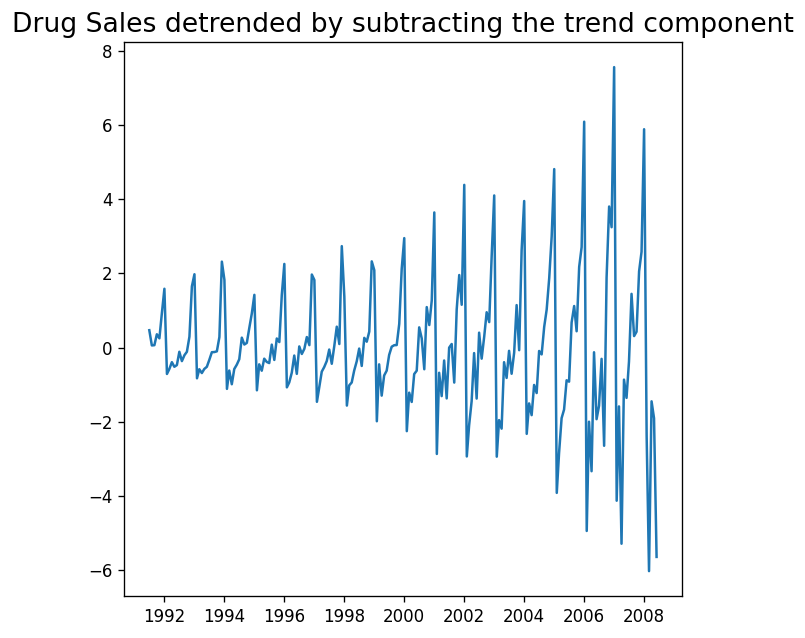

In [19]:
# =============================================================================
# DETREND (ELIMINAR TENDENCIA) - MÉTODO 1: SUSTRACCIÓN DE LA TENDENCIA
# =============================================================================

# Eliminamos la tendencia restando el componente de tendencia de la serie original
# Serie sin tendencia = Serie original - Tendencia
detrended = df.value.values - result_add.trend

# Graficamos la serie sin tendencia
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

# Ahora la serie debería oscilar alrededor de cero
# Se eliminó la tendencia creciente, pero aún mantiene estacionalidad y ruido

In [20]:
# =============================================================================
# TEST ADF SOBRE LA SERIE SIN TENDENCIA
# =============================================================================

# Aplicamos nuevamente el test de Dickey-Fuller a la serie sin tendencia
# para verificar si ahora es estacionaria
result_adf = adfuller(detrended)

# INTERPRETACIÓN:
# - p-value = 0.000285 (muy pequeño, < 0.05)
# - Conclusión: RECHAZAMOS H0 → La serie SIN tendencia ES estacionaria
# - El estadístico ADF (-4.41) es menor que los valores críticos
# 
# Esto confirma que eliminar la tendencia ayudó a hacer la serie estacionaria
result_adf

(np.float64(-4.4095890606752635),
 np.float64(0.0002854461361229724),
 15,
 188,
 {'1%': np.float64(-3.465620397124192),
  '5%': np.float64(-2.8770397560752436),
  '10%': np.float64(-2.5750324547306476)},
 np.float64(471.7249216208138))

In [21]:
# =============================================================================
# DETREND (ELIMINAR TENDENCIA) - MÉTODO 2: DIFERENCIACIÓN
# =============================================================================

# Método alternativo: calcular las diferencias entre valores consecutivos
# diff() calcula: valor(t) - valor(t-1)
# Este método es muy común en series temporales y se llama "diferenciación de orden 1"
df['diff'] = df['value'].diff()

# Mostramos las primeras filas
# Nota: La primera fila tendrá NaN porque no hay valor anterior para restar
df.head()

,value,diff
date,,
1991-07-01,3.526591,NaN
1991-08-01,3.180891,-0.345700
1991-09-01,3.252221,0.071330
1991-10-01,3.611003,0.358782
1991-11-01,3.565869,-0.045134


Text(0.5, 1.0, 'Drug Sales detrended by differencing values')

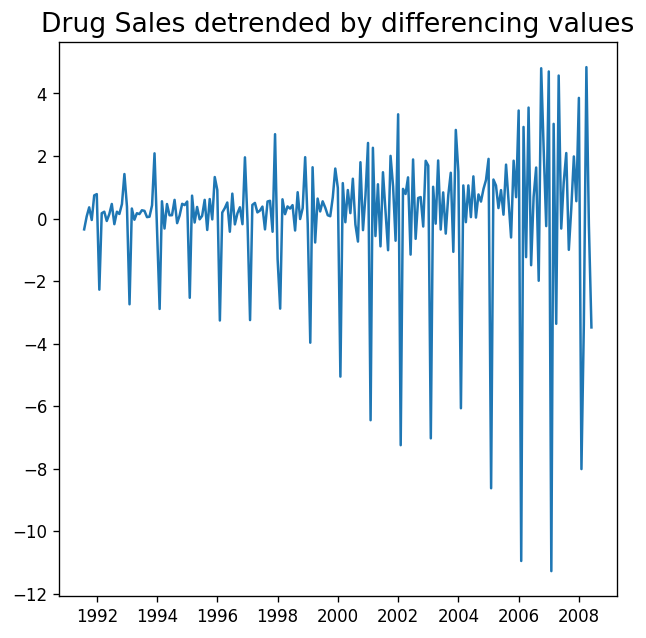

In [22]:
# =============================================================================
# GRÁFICO DE LA SERIE DIFERENCIADA
# =============================================================================

# Graficamos la serie diferenciada para ver cómo se comporta
plt.plot(df['value'].diff())
plt.title('Drug Sales detrended by differencing values', fontsize=16)

# La diferenciación elimina la tendencia mostrando solo los CAMBIOS
# En lugar de valores absolutos, vemos cuánto cambia de un mes a otro
# Si la serie tiene tendencia positiva, las diferencias serán mayormente positivas

In [23]:
# =============================================================================
# TEST ADF SOBRE LA SERIE DIFERENCIADA
# =============================================================================

# Aplicamos el test ADF a la serie diferenciada
# dropna() elimina el primer valor NaN que genera diff()
result_adf_diff = adfuller(df['value'].diff().dropna())

# INTERPRETACIÓN:
# - p-value = 0.1167 (> 0.05)
# - Conclusión: NO rechazamos H0 → La serie diferenciada AÚN NO es estacionaria
# 
# IMPORTANTE: La diferenciación simple no fue suficiente en este caso
# Podríamos necesitar:
#   - Diferenciación de orden 2: diff().diff()
#   - Diferenciación estacional: diff(12) para datos mensuales
#   - Transformación logarítmica antes de diferenciar
result_adf_diff

(np.float64(-2.495172147449788),
 np.float64(0.11665341686467584),
 15,
 187,
 {'1%': np.float64(-3.465811691080702),
  '5%': np.float64(-2.877123351472649),
  '10%': np.float64(-2.5750770662586864)},
 np.float64(547.1880809726355))

## 7. Deseasonalize
También podemos eliminarle el componente estacional de la descomposición anterior.

Vemos en este ejemplo que el modelo aditivo no es el ideal ya que siguen apareciendo patrones estacionales en la serie.

Text(0.5, 1.0, 'Drug Sales Deseasonalized')

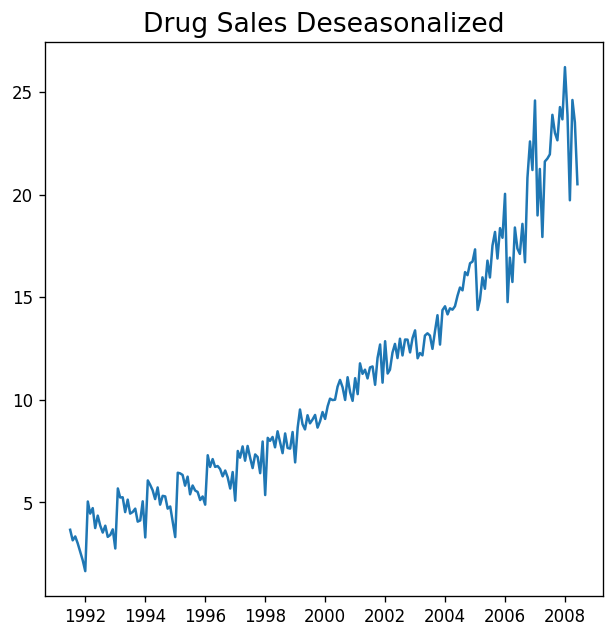

In [24]:
# =============================================================================
# DESEASONALIZE (ELIMINAR ESTACIONALIDAD) - MODELO ADITIVO
# =============================================================================

# Eliminamos la estacionalidad restando el componente estacional
# Serie sin estacionalidad = Serie original - Componente estacional
deseasonalized = df['value'].values - result_add.seasonal

# Graficamos el resultado
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)

# OBSERVACIÓN IMPORTANTE:
# Aún se ven patrones estacionales en el gráfico
# Esto indica que el modelo ADITIVO no es ideal para estos datos
# La estacionalidad parece CRECER con la tendencia (→ modelo multiplicativo)

Text(0.5, 1.0, 'Drug Sales Deseasonalized')

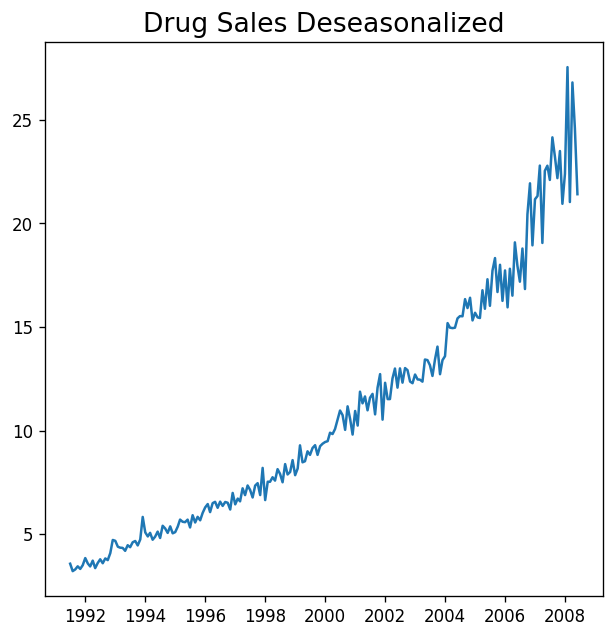

In [25]:
# =============================================================================
# DESEASONALIZE - MODELO MULTIPLICATIVO (MEJOR OPCIÓN)
# =============================================================================

# En el modelo multiplicativo, DIVIDIMOS en lugar de restar
# Serie sin estacionalidad = Serie original / Componente estacional
deseasonalized = df['value'].values / result_mul.seasonal

# Graficamos el resultado
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)

# RESULTADO:
# Ahora la serie se ve mucho mejor
# Los patrones estacionales han sido eliminados efectivamente
# Solo queda la tendencia y el ruido
# Esto confirma que el modelo MULTIPLICATIVO es más apropiado para estos datos

## 7. Comprobación del seasonality en un Time Series
Lo mejor es mediante un plot, pero también puede resultar útil graficar la autocorrelación.

Vemos claramente los picos que hay cada 12 lags.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

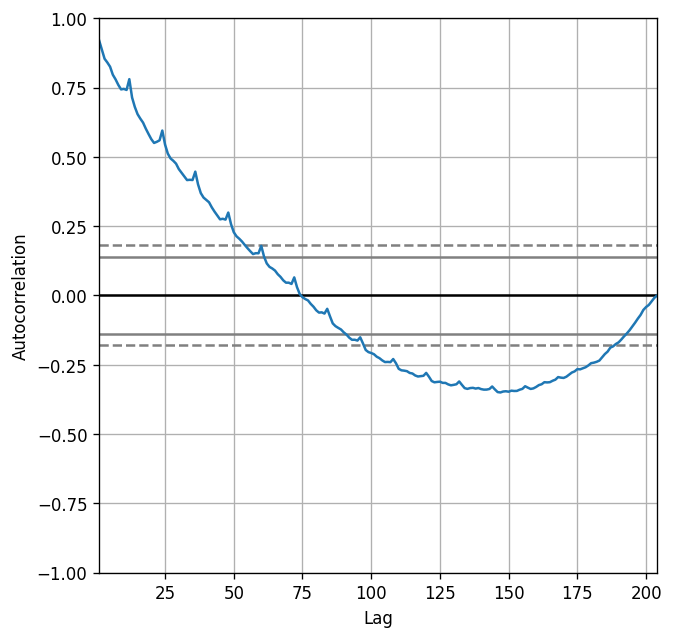

In [26]:
# =============================================================================
# GRÁFICO DE AUTOCORRELACIÓN - DETECTAR ESTACIONALIDAD
# =============================================================================

# Importamos la función de gráfico de autocorrelación
from pandas.plotting import autocorrelation_plot

# El gráfico de autocorrelación muestra la correlación de la serie consigo misma
# en diferentes "lags" (retrasos temporales)
# 
# Lag 1 = correlación con el valor anterior
# Lag 12 = correlación con el valor de hace 12 meses
# 
# Si hay estacionalidad, veremos PICOS cada N lags (donde N = periodo estacional)
autocorrelation_plot(df['value'])

# INTERPRETACIÓN:
# - Los picos se repiten cada 12 lags (cada año)
# - Esto confirma estacionalidad ANUAL en datos mensuales
# - Las líneas punteadas horizontales marcan los límites de significancia

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

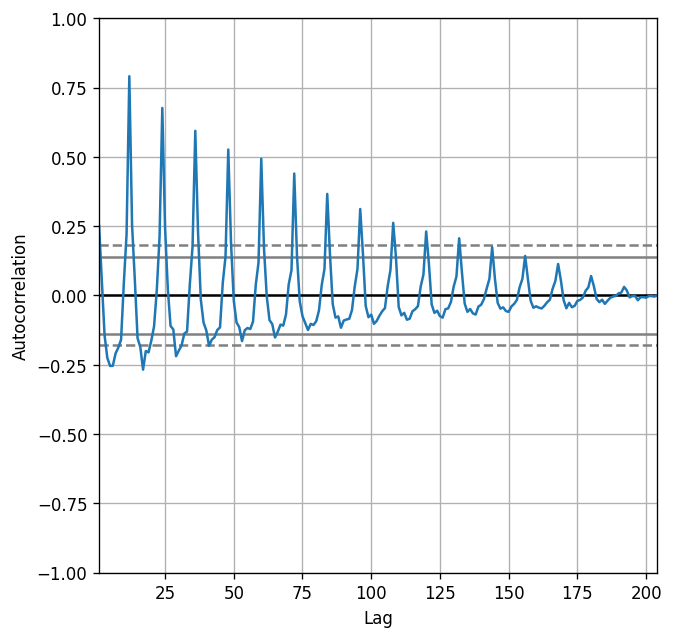

In [27]:
# =============================================================================
# AUTOCORRELACIÓN DESPUÉS DE ELIMINAR LA TENDENCIA
# =============================================================================

# Calculamos nuevamente la serie sin tendencia
detrended = df.value.values - result_add.trend

# Graficamos la autocorrelación de la serie sin tendencia
# Convertimos a lista porque puede haber valores NaN
autocorrelation_plot(detrended.tolist())

# INTERPRETACIÓN:
# - Los picos cada 12 lags SIGUEN PRESENTES
# - Esto confirma que la ESTACIONALIDAD permanece incluso sin tendencia
# - Para una serie completamente estacionaria, necesitamos eliminar AMBAS:
#   tendencia Y estacionalidad

## 8. Missings

In [28]:
# =============================================================================
# CARGA DE DATOS CON VALORES FALTANTES (MISSINGS)
# =============================================================================

# Cargamos un archivo especial que contiene valores faltantes (NaN)
# Este dataset es útil para demostrar técnicas de imputación
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

# Mostramos el DataFrame completo
# Observamos que hay varios valores NaN en la columna 'value'
# Los valores faltantes son comunes en series temporales reales por:
#   - Errores de medición
#   - Fallos en sensores
#   - Datos no registrados
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,NaN
1991-10-01,3.611003
1991-11-01,NaN
...,...
1999-06-01,8.165323
1999-07-01,NaN
1999-08-01,9.070964


C:\Users\borja\AppData\Local\Temp\ipykernel_10468\2428679552.py:102: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


<Axes: title={'center': 'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

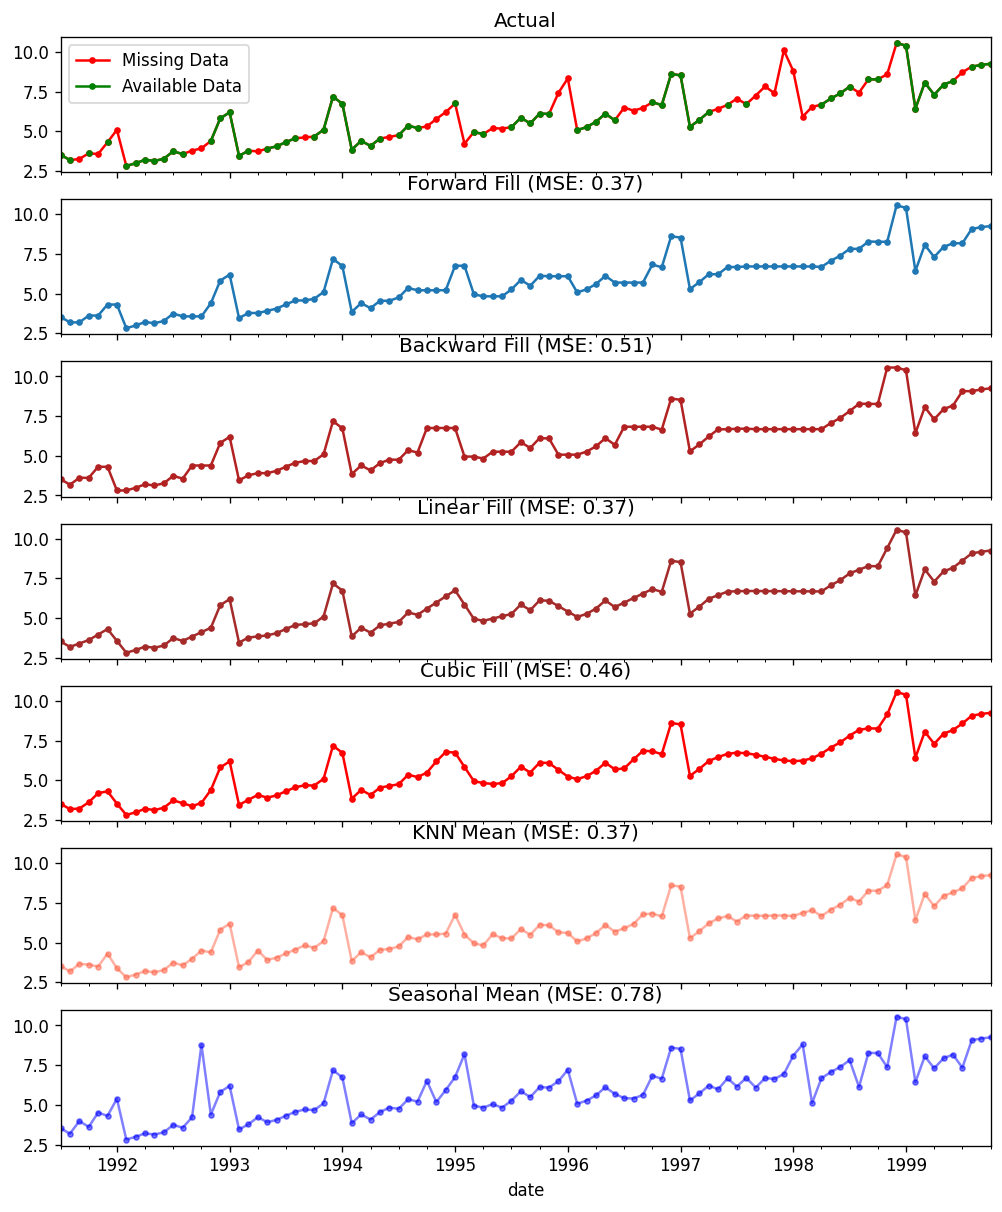

In [29]:
# =============================================================================
# COMPARACIÓN DE MÉTODOS PARA IMPUTAR VALORES FALTANTES
# =============================================================================

# Importamos librerías necesarias para interpolación y métricas
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from scipy import interpolate

# Cargamos datos originales (sin missings) para comparar
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date').head(100)

# Cargamos datos con missings
df = pd.read_csv('data/a10_missings.csv', parse_dates=['date'], index_col='date')

# Creamos una figura con 7 subgráficos (uno por cada método)
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})  # Ocultamos ticks del eje X

## 1. DATOS ORIGINALES vs DATOS CON MISSINGS
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. FORWARD FILL (Rellenar hacia adelante)
# Llena cada NaN con el último valor válido anterior
# Método simple pero puede crear "escalones" en los datos
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", 
                       ax=axes[1], label='Forward Fill', style=".-")

## 3. BACKWARD FILL (Rellenar hacia atrás)
# Llena cada NaN con el siguiente valor válido
# También simple, pero puede no ser realista (usa información del futuro)
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", 
                      ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. INTERPOLACIÓN LINEAL
# Traza una línea recta entre puntos conocidos
# Más suave que forward/backward fill
df['rownum'] = np.arange(df.shape[0])  # Creamos índice numérico
df_nona = df.dropna(subset=['value'])  # Eliminamos filas con NaN
f = interp1d(df_nona['rownum'], df_nona['value'])  # Función de interpolación
df['linear_fill'] = f(df['rownum'])  # Aplicamos interpolación
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", 
                      ax=axes[3], label='Linear Fill', color='brown', style=".-")

## 5. INTERPOLACIÓN CÚBICA
# Usa polinomios de grado 3 para crear curvas suaves
# Mejor para datos con curvaturas
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", 
                     ax=axes[4], label='Cubic Fill', color='red', style=".-")

## 6. MEDIA DE 'n' VECINOS MÁS CERCANOS (KNN Mean)
def knn_mean(ts, n):
    """
    Imputa valores faltantes usando la media de n vecinos cercanos
    
    Parámetros:
        ts: serie temporal con NaN
        n: número de vecinos a considerar
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):  # Si el valor es NaN
            n_by_2 = np.ceil(n/2)  # Mitad de vecinos antes, mitad después
            lower = np.max([0, int(i-n_by_2)])  # Límite inferior
            upper = np.min([len(ts)+1, int(i+n_by_2)])  # Límite superior
            # Tomamos valores antes y después del missing
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            # Promediamos ignorando NaN
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", 
                   ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. MEDIA ESTACIONAL (Seasonal Mean)
def seasonal_mean(ts, n, lr=0.7):
    """
    Imputa usando la media de periodos estacionales correspondientes
    
    Parámetros:
        ts: serie temporal
        n: longitud del periodo estacional (12 para datos mensuales)
        lr: factor de aprendizaje para ajustar la media
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            # Tomamos los valores del mismo mes en años anteriores
            ts_seas = ts[i-1::-n]  # Solo temporadas previas
            if np.isnan(np.nanmean(ts_seas)):
                # Si no hay suficientes datos previos, usamos también futuros
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])
            # Promediamos y ajustamos con el factor lr
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", 
                        ax=axes[6], label='Seasonal Mean', 
                        color='blue', alpha=0.5, style=".-")

# COMPARACIÓN DE MÉTODOS:
# - MSE (Mean Squared Error): cuanto menor, mejor
# - Forward/Backward Fill: rápidos pero simples
# - Interpolación Lineal/Cúbica: buenos para tendencias suaves
# - KNN Mean: considera vecindad local
# - Seasonal Mean: mejor para datos con estacionalidad fuerte

## 9. Smoothing
Cómo suavizar la gráfica para ver mejor la tendencia.

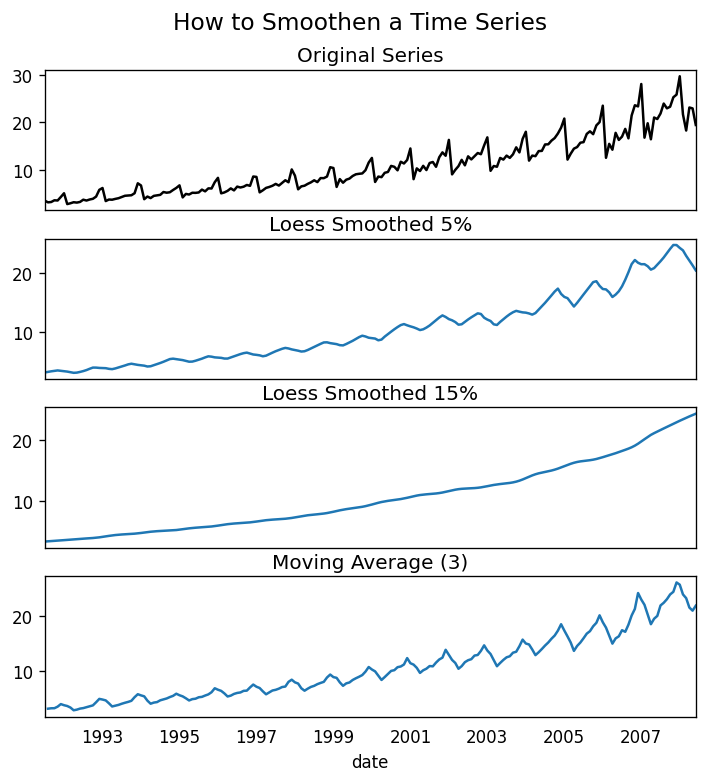

In [30]:
# =============================================================================
# TÉCNICAS DE SUAVIZADO (SMOOTHING) PARA SERIES TEMPORALES
# =============================================================================

# Importamos LOWESS (Locally Weighted Scatterplot Smoothing)
from statsmodels.nonparametric.smoothers_lowess import lowess

# Configuración de gráficos
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Cargamos datos originales
df_orig = pd.read_csv('data/a10.csv', parse_dates=['date'], index_col='date')

## MÉTODO 1: MEDIA MÓVIL (Moving Average)
# Calcula el promedio de una ventana deslizante
# Parámetros:
#   - 3: tamaño de la ventana (promedia 3 valores)
#   - center=True: la ventana está centrada en cada punto
#   - closed='both': incluye ambos extremos de la ventana
df_ma = df_orig['value'].rolling(3, center=True, closed='both').mean()

## MÉTODO 2: SUAVIZADO LOESS (LOWESS) con 5% de datos
# LOESS = regresión polinomial local ponderada
# frac=0.05 significa que usa el 5% de los datos más cercanos para cada punto
# Menor frac = menos suavizado, sigue más de cerca los datos originales
df_loess_5 = pd.DataFrame(
    lowess(df_orig.value,  # Valores Y
           np.arange(len(df_orig.value)),  # Valores X (índices)
           frac=0.05)[:, 1],  # Tomamos solo la columna Y suavizada
    index=df_orig.index, 
    columns=['value'])

## MÉTODO 3: SUAVIZADO LOESS con 15% de datos
# frac=0.15 usa el 15% de los datos
# Mayor frac = más suavizado, curva más suave pero puede perder detalles
df_loess_15 = pd.DataFrame(
    lowess(df_orig.value, 
           np.arange(len(df_orig.value)), 
           frac=0.15)[:, 1], 
    index=df_orig.index, 
    columns=['value'])

# Creamos 4 subgráficos para comparar
fig, axes = plt.subplots(4, 1, figsize=(7, 7), sharex=True, dpi=120)

# 1. Serie original (sin suavizado)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')

# 2. LOESS 5% - sigue de cerca los datos
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')

# 3. LOESS 15% - mucho más suave, muestra tendencia clara
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')

# 4. Media móvil - simple pero efectivo
df_ma.plot(ax=axes[3], title='Moving Average (3)')

# Título general de la figura
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)

# Mostramos los gráficos
plt.show()

# USOS DEL SUAVIZADO:
# - Visualizar tendencias eliminando ruido
# - Identificar puntos de cambio
# - Comparar diferentes niveles de detalle
# - Preparar datos para ciertos modelos predictivos